## Linear & Generalized Linear Models
## 2. Linear Discriminant Analysis (LDA)

In [7]:
import pandas as pd

# Load CSV file
Dataset_Train = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Train_Final.csv')
Dataset_Test = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Test_Final.csv')

In [8]:
# Convert the specified columns to categorical
Dataset_Train['stress_level'] = Dataset_Train['stress_level'].astype('category')

# Verify the changes
print(Dataset_Train[['stress_level']].dtypes)
# Convert the specified columns to categorical
Dataset_Test['stress_level'] = Dataset_Test['stress_level'].astype('category')

# Verify the changes
print(Dataset_Test[['stress_level']].dtypes)

stress_level    category
dtype: object
stress_level    category
dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✅ Train Accuracy: 0.71375
✅ Test Accuracy: 0.695

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.33      0.03      0.06        29
    Diabetes       0.00      0.00      0.00        57
Hypertension       0.00      0.00      0.00        87
     healthy       0.71      0.97      0.82       427

    accuracy                           0.69       600
   macro avg       0.26      0.25      0.22       600
weighted avg       0.52      0.69      0.59       600



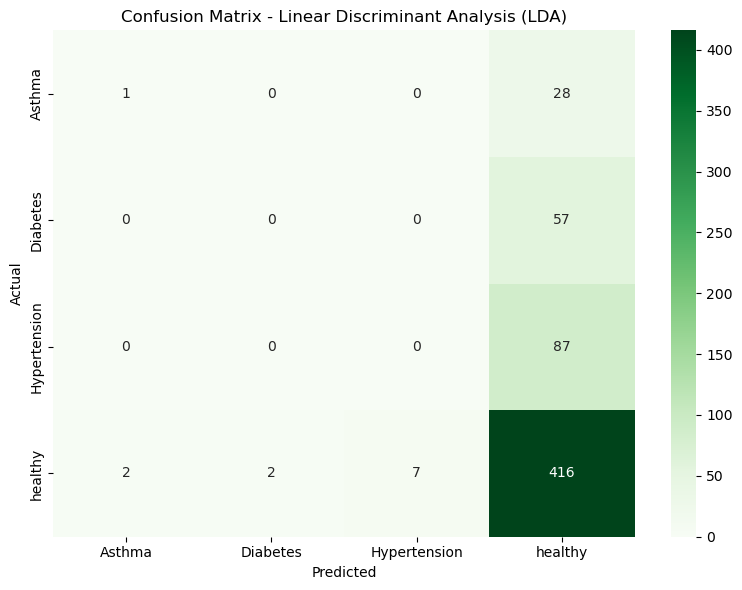

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Prepare features and target
X_train = Dataset_Train.drop(columns=['health_condition'])
y_train = Dataset_Train['health_condition']
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']

# 2. Identify column types
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
# 1. Preprocessor with dense output
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# 2. Transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 3. Encode target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# 4. Train LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_processed, y_train_encoded)

# 5. Predict
y_train_pred = le.inverse_transform(lda_model.predict(X_train_processed))
y_test_pred = le.inverse_transform(lda_model.predict(X_test_processed))

# 6. Evaluate
print("✅ Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Linear Discriminant Analysis (LDA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import recall_score, f1_score

# ================================================
# 🔍 Additional Evaluation Metrics
# ================================================

# Sensitivity (Recall)
train_sensitivity = recall_score(y_train, y_train_pred, average='weighted')
test_sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# F1 Score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("🔹 Additional Performance Metrics 🔹")
print(f"✅ Train Sensitivity (Recall): {train_sensitivity:.4f}")
print(f"✅ Test Sensitivity (Recall):  {test_sensitivity:.4f}")
print(f"✅ Train F1 Score:             {train_f1:.4f}")
print(f"✅ Test F1 Score:              {test_f1:.4f}")

🔹 Additional Performance Metrics 🔹
✅ Train Sensitivity (Recall): 0.7137
✅ Test Sensitivity (Recall):  0.6950
✅ Train F1 Score:             0.6161
✅ Test F1 Score:              0.5864


## With Smote

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✅ Before SMOTE: {3: 1711, 2: 347, 1: 226, 0: 116}
✅ After SMOTE: {3: 1711, 2: 1711, 1: 1711, 0: 1711}
✅ Train Accuracy: 0.4766218585622443
✅ Test Accuracy: 0.245

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.04      0.24      0.07        29
    Diabetes       0.11      0.32      0.16        57
Hypertension       0.19      0.31      0.23        87
     healthy       0.77      0.22      0.34       427

    accuracy                           0.24       600
   macro avg       0.28      0.27      0.20       600
weighted avg       0.58      0.24      0.30       600



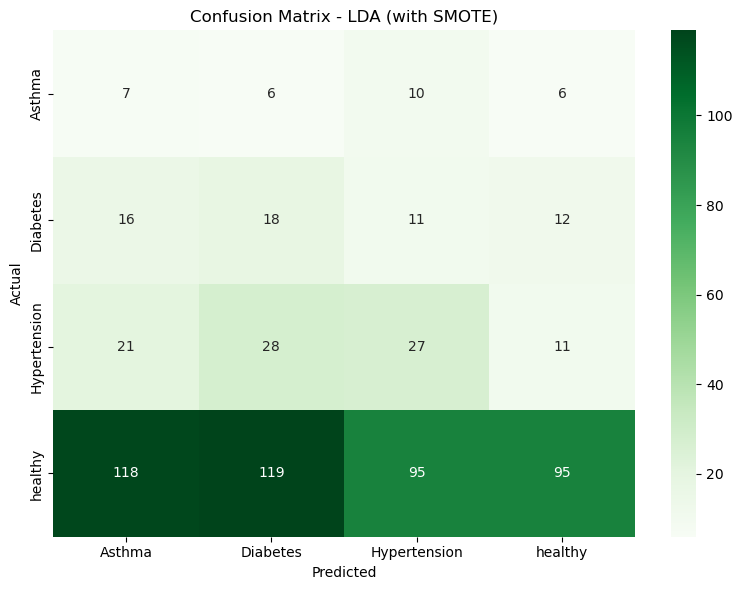

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1️⃣ Prepare Features and Target
# ==========================================
X_train = Dataset_Train.drop(columns=['health_condition'])
y_train = Dataset_Train['health_condition']
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']

# ==========================================
# 2️⃣ Identify Column Types
# ==========================================
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ==========================================
# 3️⃣ Preprocessing (Scaling + OneHotEncoding)
# ==========================================
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# Fit & transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ==========================================
# 4️⃣ Encode Target Variable
# ==========================================
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ==========================================
# 5️⃣ Apply SMOTE (Only on Training Data)
# ==========================================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train_encoded)

print("✅ Before SMOTE:", dict(pd.Series(y_train_encoded).value_counts()))
print("✅ After SMOTE:", dict(pd.Series(y_train_resampled).value_counts()))

# ==========================================
# 6️⃣ Train Linear Discriminant Analysis (LDA)
# ==========================================
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_resampled, y_train_resampled)

# ==========================================
# 7️⃣ Predictions
# ==========================================
y_train_pred = le.inverse_transform(lda_model.predict(X_train_resampled))
y_test_pred = le.inverse_transform(lda_model.predict(X_test_processed))

# ==========================================
# 8️⃣ Evaluation
# ==========================================
print("✅ Train Accuracy:", accuracy_score(le.inverse_transform(y_train_resampled), y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# ==========================================
# 9️⃣ Confusion Matrix (Test Set)
# ==========================================
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - LDA (with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
